<img src="img/es2_logo.jpg" alt="EarthServer-logo" width="50%"  border="4">
<br><br>


# Web Services for Big Earth Data

## Marine Science challenges

### Oliver Clements

# Using uncertainty alongside ocean colour data

I work for a group focused on remote sensesed (satellite) data, mainly concerning the colour of the oceans. We use the colour to assess the quantity of chlorophyll, which is a measure of the levels of photosynthetic plankton. Phytoplankton are important as the are the base of the food pyramid and therefore provide a good indicator as to the health of the oceans.

## ESA climate change initiative

CCI is a very large project funded by ESA split over multiple scientific domains. The Ocean Colur sub project has created an almost 20 year archive of ocean colour data. All variables have been caluclated with associated uncertainty. Basically a measure of the confidence in the value calculated. 

WCPS allows the use of multiple coverages in a single query. This menas that we can integrate the uncertainty data into any queries we do with respect to chlorphyll. Some practical examples follow.

# Find the number of pixels globally that have a RMSD uncertainty of less that 0.2

## Query
```
for  d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)

 count(d[ ansi("2010-01-31T23:59:00")] < 0.2 )
, "csv"

)
```

In [1]:
import requests

query = """
for  d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)

 count(d[ ansi("2010-01-31T23:59:00")] < 0.2 )
, "csv"

)
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

print(resp.text)

3971


# Calculate chlorphyll average only where uncertainty is below a threshold


## Query

```
for c in ( CCI_V2_release_chlor_a ), d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)
 avg(
 c[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] *
  (d[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] < 0.1 )
 ), "csv"

)
```

In [29]:
import requests

query = """
for c in ( CCI_V2_release_chlor_a ), d in (CCI_V2_monthly_chlor_a_rmsd)
return 
encode((float)
 avg(
 c[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] *
  (d[Long(0:10), Lat(45:55), ansi("2010-01-31T23:59:00")] < 0.35 )
 ), "csv"

)
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

print(resp.text)

0.00611333


## applying your own colour scale and values to a chlorophyll concentratin map

## Query
```
for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} %0Acase 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")
```

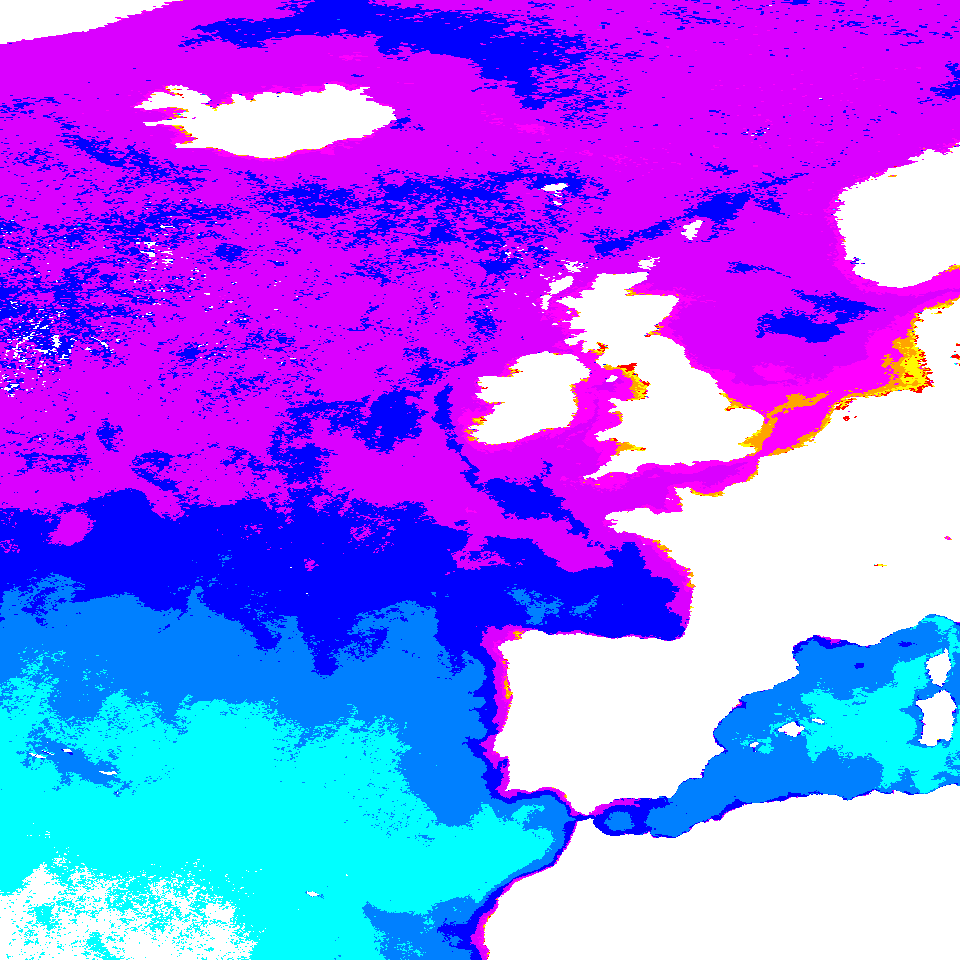

In [2]:
import requests

query = """
for a in (CCI_V2_monthly_chlor_a) return encode (switch case 0.05 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")] return {red: 255; green: 255; blue: 255; alpha: 0} case 0.1 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 255; blue: 255; alpha: 255} case 0.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 128; blue: 255; alpha: 255} case 0.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 0; green: 0; blue: 255; alpha: 255} %0Acase 1.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 218; green: 0; blue: 255; alpha: 255} case 3.0 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 255; alpha: 255} case 4.5 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 164; blue: 0; alpha: 255} case 6.2 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 250; blue: 0; alpha: 255} case 20 > a[Lat(30:70),Long(-30:10),ansi("2009-09-30T23:59:00Z")]  return {red: 255; green: 0; blue: 0; alpha: 255} default return {red: 255; green: 255; blue:255; alpha: 0} ,"png")
"""

resp = requests.post('http://earthserver.pml.ac.uk/rasdaman/ows/wcps', data = {'query':query})

from IPython.display import Image 
Image(data=resp.content)